In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

In [3]:
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [4]:
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [5]:
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer

In [7]:
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model

In [8]:
#TENSORFLOW
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2

In [9]:
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [10]:
Wave_Train_Path = Path(r"D:\NIT Trichy\PD_detection\wave\training")
Wave_Test_Path = Path(r"D:\NIT Trichy\PD_detection\wave\testing")
print(Wave_Train_Path)
print(Wave_Test_Path)

D:\NIT Trichy\PD_detection\wave\training
D:\NIT Trichy\PD_detection\wave\testing


In [11]:
Wave_Train_PNG_Path = list(Wave_Train_Path.glob(r"*/*.png"))
Wave_Test_PNG_Path = list(Wave_Test_Path.glob(r"*/*.png"))
print(Wave_Train_PNG_Path)
print("---------------")
print(Wave_Test_PNG_Path)

[WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V01HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V01HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V02HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V02HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V03HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V03HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V04HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V04HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V05HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V05HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V06HO02.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V06HO03.png'), WindowsPath('D:/NIT Trichy/PD_detection/wave/training/healthy/V07HO02.png')

In [12]:
Wave_Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wave_Train_PNG_Path))
Wave_Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wave_Test_PNG_Path))
print(Wave_Train_PNG_Labels)
print("------------")
print(Wave_Test_PNG_Labels)

['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson']
------------
['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 

In [13]:
Wave_Train_PNG_Path_Series = pd.Series(Wave_Train_PNG_Path,name="PNG").astype(str)
Wave_Train_PNG_Labels_Series = pd.Series(Wave_Train_PNG_Labels,name="CATEGORY")
print(Wave_Train_PNG_Path_Series)
print("------------")
print(Wave_Train_PNG_Labels_Series)

0     D:\NIT Trichy\PD_detection\wave\training\healt...
1     D:\NIT Trichy\PD_detection\wave\training\healt...
2     D:\NIT Trichy\PD_detection\wave\training\healt...
3     D:\NIT Trichy\PD_detection\wave\training\healt...
4     D:\NIT Trichy\PD_detection\wave\training\healt...
                            ...                        
67    D:\NIT Trichy\PD_detection\wave\training\parki...
68    D:\NIT Trichy\PD_detection\wave\training\parki...
69    D:\NIT Trichy\PD_detection\wave\training\parki...
70    D:\NIT Trichy\PD_detection\wave\training\parki...
71    D:\NIT Trichy\PD_detection\wave\training\parki...
Name: PNG, Length: 72, dtype: object
------------
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
        ...    
67    parkinson
68    parkinson
69    parkinson
70    parkinson
71    parkinson
Name: CATEGORY, Length: 72, dtype: object


In [14]:
Wave_Test_PNG_Path_Series = pd.Series(Wave_Test_PNG_Path,name="PNG").astype(str)
Wave_Test_PNG_Labels_Series = pd.Series(Wave_Test_PNG_Labels,name="CATEGORY")

In [15]:
Main_Wave_Train_Data = pd.concat([Wave_Train_PNG_Path_Series,Wave_Train_PNG_Labels_Series],axis=1)
print(Main_Wave_Train_Data)

                                                  PNG   CATEGORY
0   D:\NIT Trichy\PD_detection\wave\training\healt...    healthy
1   D:\NIT Trichy\PD_detection\wave\training\healt...    healthy
2   D:\NIT Trichy\PD_detection\wave\training\healt...    healthy
3   D:\NIT Trichy\PD_detection\wave\training\healt...    healthy
4   D:\NIT Trichy\PD_detection\wave\training\healt...    healthy
..                                                ...        ...
67  D:\NIT Trichy\PD_detection\wave\training\parki...  parkinson
68  D:\NIT Trichy\PD_detection\wave\training\parki...  parkinson
69  D:\NIT Trichy\PD_detection\wave\training\parki...  parkinson
70  D:\NIT Trichy\PD_detection\wave\training\parki...  parkinson
71  D:\NIT Trichy\PD_detection\wave\training\parki...  parkinson

[72 rows x 2 columns]


In [16]:
Main_Wave_Test_Data = pd.concat([Wave_Test_PNG_Path_Series,Wave_Test_PNG_Labels_Series],axis=1)

In [17]:
Main_Wave_Train_Data = Main_Wave_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Wave_Test_Data = Main_Wave_Test_Data.sample(frac=1).reset_index(drop=True)
print(Main_Wave_Test_Data)

                                                  PNG   CATEGORY
0   D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
1   D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
2   D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
3   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
4   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
5   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
6   D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
7   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
8   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
9   D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
10  D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
11  D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
12  D:\NIT Trichy\PD_detection\wave\testing\parkin...  parkinson
13  D:\NIT Trichy\PD_detection\wave\testing\health...    healthy
14  D:\NIT Trichy\PD_dete

In [18]:
x_train = []
for i in range(len(Main_Wave_Train_Data)):
    img = cv2.imread(Main_Wave_Train_Data["PNG"][i])
    x_train.append(np.array(img))

In [19]:
x_test= []
for i in range(len(Main_Wave_Test_Data)):
    img = cv2.imread(Main_Wave_Test_Data["PNG"][i])
    x_test.append(np.array(img))

In [20]:
train_data_generator = ImageDataGenerator(rotation_range=5, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                              #      brightness_range=[0.3, 1.8],
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

x = list(x_train)
y = list(Main_Wave_Train_Data["CATEGORY"])

x_aug_train = []
y_aug_train = []

for (i, v) in enumerate(y):
    x_img = x[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = train_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(70):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_train.append(aug_image)
        y_aug_train.append(v)
print(len(x_aug_train))
print(len(y_aug_train))

x_train = x + x_aug_train
y_train = y + y_aug_train
print(len(x_train))
print(len(y_train))

test_data_generator = ImageDataGenerator(rotation_range=5, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1, 
                       #             brightness_range=[0.3, 1.8],
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

x = list(x_test)
y = list(Main_Wave_Test_Data["CATEGORY"])

x_aug_test = []
y_aug_test = []

for (i, v) in enumerate(y):
    x_img = x[i]
    x_img = np.array(x_img)
    x_img = np.expand_dims(x_img, axis=0)
    aug_iter = test_data_generator.flow(x_img, batch_size=1, shuffle=True)
    for j in range(20):
        aug_image = next(aug_iter)[0].astype('uint8')
        x_aug_test.append(aug_image)
        y_aug_test.append(v)
print(len(x_aug_test))
print(len(y_aug_test))

x_test = x + x_aug_test
y_test = y + y_aug_test
print(len(x_test))
print(len(y_test))

5040
5040
5112
5112
600
600
630
630


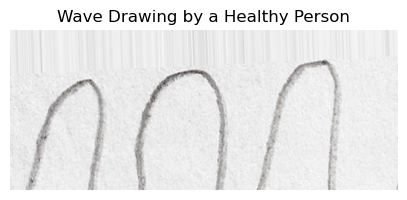

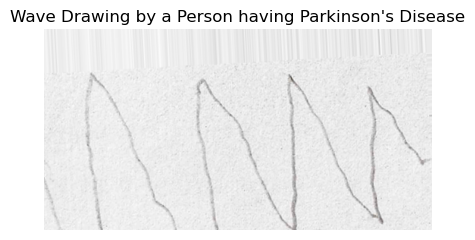

In [21]:
# print(y_test)
figure1 = plt.figure(figsize=(5, 5))
idx_healthy = [i for (i, v) in enumerate(y_train) if v=='healthy']
img_healthy = x_train[idx_healthy[-1]]
plt.imshow(img_healthy)
plt.title('Wave Drawing by a Healthy Person')
plt.axis('off')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
idx_parkinson = [i for (i, v) in enumerate(y_train) if v=='parkinson']
img_parkinson = x_train[idx_parkinson[-1]]
plt.imshow(img_parkinson)
plt.title("Wave Drawing by a Person having Parkinson's Disease")
plt.axis('off')
plt.show()

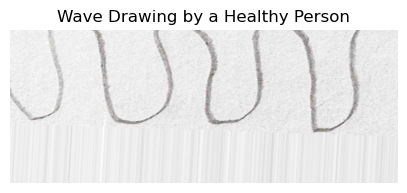

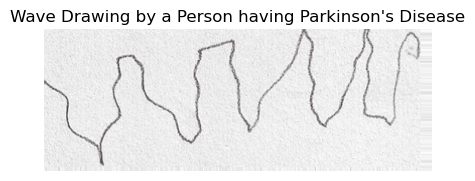

In [22]:
figure1 = plt.figure(figsize=(5, 5))
idx_healthy = [i for (i, v) in enumerate(y_test) if v=='healthy']
img_healthy = x_test[idx_healthy[-1]]
plt.imshow(img_healthy)
plt.title('Wave Drawing by a Healthy Person')
plt.axis('off')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
idx_parkinson = [i for (i, v) in enumerate(y_test) if v=='parkinson']
img_parkinson = x_test[idx_parkinson[-1]]
plt.imshow(img_parkinson)
plt.title("Wave Drawing by a Person having Parkinson's Disease")
plt.axis('off')
plt.show()

In [23]:
for i in range(len(x_train)):
    img = x_train[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_train[i] = img
    
for i in range(len(x_test)):
    img = x_test[i]
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x_test[i] = img

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train/255.0
x_test = x_test/255.0

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(y_train.shape)

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
print(y_test.shape)

(5112,)
(630,)


In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5112, 128, 128, 1)
(5112, 2)
(630, 128, 128, 1)
(630, 2)


In [25]:
def parkinson_disease_detection_model(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))
    
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
model= parkinson_disease_detection_model(input_shape=(128, 128, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [ ]:
hist = model.fit(x_train, y_train, batch_size=10, epochs=70, validation_data=(x_test, y_test))

Epoch 1/70
512/512 [==============================] - 44s 81ms/step - loss: 0.8246 - accuracy: 0.4986 - val_loss: 0.7993 - val_accuracy: 0.5000
Epoch 2/70
512/512 [==============================] - 43s 84ms/step - loss: 0.7852 - accuracy: 0.4957 - val_loss: 0.7727 - val_accuracy: 0.5000
Epoch 3/70
512/512 [==============================] - 42s 81ms/step - loss: 0.7651 - accuracy: 0.4996 - val_loss: 0.7575 - val_accuracy: 0.5381
Epoch 4/70
512/512 [==============================] - 43s 85ms/step - loss: 0.7522 - accuracy: 0.4955 - val_loss: 0.7468 - val_accuracy: 0.5079
Epoch 5/70
512/512 [==============================] - 42s 83ms/step - loss: 0.7426 - accuracy: 0.4980 - val_loss: 0.7383 - val_accuracy: 0.5000
Epoch 6/70
512/512 [==============================] - 43s 85ms/step - loss: 0.7347 - accuracy: 0.5020 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 7/70
512/512 [==============================] - 43s 84ms/step - loss: 0.7281 - accuracy: 0.5180 - val_loss: 0.7253 - val_accuracy:

In [ ]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
ypred = model.predict(x_test)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
print(classification_report(y_test_pred, ypred))

In [ ]:
matrix = confusion_matrix(y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
labels = ['Healthy', 'Parkinson']
image_healthy = cv2.imread(r"D:\NIT Trichy\PD_detection\wave\testing\healthy\V11HO01.png")
image_parkinson = cv2.imread(r"D:\NIT Trichy\PD_detection\wave\testing\parkinson\V09PO01.png")

image_healthy = cv2.resize(image_healthy, (128, 128))
image_healthy = cv2.cvtColor(image_healthy, cv2.COLOR_BGR2GRAY)
image_healthy = np.array(image_healthy)
image_healthy = np.expand_dims(image_healthy, axis=0)
image_healthy = np.expand_dims(image_healthy, axis=-1)

image_parkinson = cv2.resize(image_parkinson, (128, 128))
image_parkinson = cv2.cvtColor(image_parkinson, cv2.COLOR_BGR2GRAY)
image_parkinson = np.array(image_parkinson)
image_parkinson = np.expand_dims(image_parkinson, axis=0)
image_parkinson = np.expand_dims(image_parkinson, axis=-1)

In [ ]:
ypred_healthy = model.predict(image_healthy)
ypred_parkinson = model.predict(image_parkinson)
print(ypred_healthy)

In [ ]:
figure = plt.figure(figsize=(2, 2))
img_healthy = np.squeeze(image_healthy, axis=0)
plt.imshow(img_healthy)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_healthy[0], axis=0)]}')
plt.show()

In [ ]:
figure = plt.figure(figsize=(2, 2))
image_parkinson = np.squeeze(image_parkinson, axis=0)
plt.imshow(image_parkinson)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_parkinson[0], axis=0)]}')
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("WaveModel.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("WaveModel.h5py")
print("Saved model to disk")

In [ ]:
from keras.preprocessing import image
from keras.models import model_from_json
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import json
import tensorflow as tf

json_file = open('WaveModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("WaveModel.h5py")

print("Loaded model from disk")
labels = ['Healthy', 'Parkinson']
image_healthy = cv2.imread(r"D:\NIT Trichy\PD_detection\wave\testing\healthy\V11HO01.png")
image_parkinson = cv2.imread(r"D:\NIT Trichy\PD_detection\wave\testing\parkinson\V09PO01.png")

image_healthy = cv2.resize(image_healthy, (128, 128))
image_healthy = cv2.cvtColor(image_healthy, cv2.COLOR_BGR2GRAY)
image_healthy = np.array(image_healthy)
image_healthy = np.expand_dims(image_healthy, axis=0)
image_healthy = np.expand_dims(image_healthy, axis=-1)

image_parkinson = cv2.resize(image_parkinson, (128, 128))
image_parkinson = cv2.cvtColor(image_parkinson, cv2.COLOR_BGR2GRAY)
image_parkinson = np.array(image_parkinson)
image_parkinson = np.expand_dims(image_parkinson, axis=0)
image_parkinson = np.expand_dims(image_parkinson, axis=-1)

ypred_healthy = loaded_model.predict(image_healthy)
ypred_parkinson = loaded_model.predict(image_parkinson)

figure = plt.figure(figsize=(2, 2))
image_parkinson = np.squeeze(image_parkinson, axis=0)
plt.imshow(image_parkinson)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_parkinson[0], axis=0)]}')
plt.show()

In [ ]:
figure = plt.figure(figsize=(2, 2))
img_healthy = np.squeeze(image_healthy, axis=0)
plt.imshow(img_healthy)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_healthy[0], axis=0)]}')
plt.show()